In [101]:
# load all libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np    
from sklearn.linear_model import RidgeCV

Build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from: Auto-mpg dataset. 

1. Load the data as a Pandas data frame and ensure that it imported correctly.
2. Begin by prepping the data for modeling:
3. Remove the car name column.
4. The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
5. Create dummy variables for the origin column.
6. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
7. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
8. Randomly split the data into 80% training data and 20% test data, where your target is mpg.
9. Train an ordinary linear regression on the training data.
10. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
11. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [102]:
#supress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [103]:
# import auto-mpg.csv file into  a dataframe
df = pd.read_csv('/Users/pyadav/Documents/DSC550-T303/Assignments/auto-mpg.csv')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [104]:
# lets do some basic data exploration to make sure data is loaded correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [105]:
# remove the car name column
df = df.drop('car name', axis=1)   
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


In [106]:
# The horsepower column values likely imported as a string data type. 
# Figure out why and replace any strings with the column mean.
# check the non numeric values present in horsepower column and group the count by those values
print('Non-numeric values in column:',df[pd.to_numeric(df['horsepower'], errors='coerce').isna()]['horsepower'].value_counts())

Non-numeric values in column: horsepower
?    6
Name: count, dtype: int64


As you see above the horsepower column contains 6 rows with "?" as values. This caused the variable to be imported as string / object intead of numeric. Lets correct this using next code snippet.

In [107]:
# convert the horsepower column to numeric, coerce errors to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
# replace NaN values with the mean of the column
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1


In [108]:
# Describe the dataset to get the summary statistics
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Interpretation
There are 398 rows and none of them are missing. Horsepower is now numeric but with a mean of 104, 75th percentile at 125 and maxx of 230 suggests that there are some high powered outliers in the class. The mpg variable have a mean of 23.5 and 75th percentile at 29 with a max of 46.6 means there could be some high efficiency outliers. Lets do a box plot to better visualize the outliers and data.

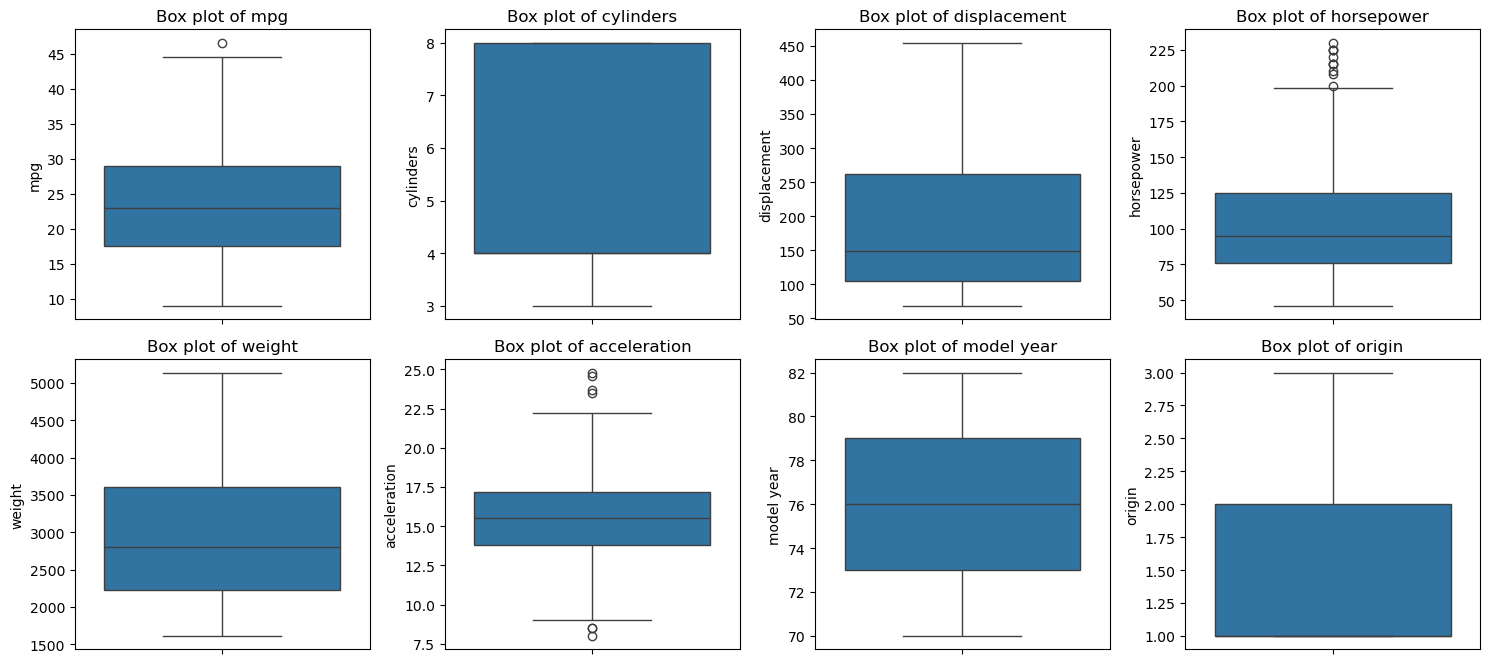

In [109]:
# plot box plots for each numeric column to visualize the spread and identify any potential outliers  

# list all numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# create box plots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

#### Interpretation of box plots

1. Bulk of cars clusters between 17 to 19 miles per gallon but there are a few with high efficiency reaching 46.6
2. Displacement data is right skewed as most of the data is between 100 to 250 with a mean of 104 but the tail extends to 450.
3. Weight and horsepower are also right skewed with horsepower showing a lot of outliers above 200 which could be due to some sports car models.
4. Acceleration data is normally distributed with few high acceleration outliers & some low acceleration which could again be sports cars or acceleration controlled heavy vehicles respectively



In [110]:
# check the distinct values in the 'origin' column
df['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [111]:
# Create dummy variables for the origin column keeping the original origin column. 
# Origin has three distinct values: 1, 2, and 3.
# So if origin is 1, then origin_1 = 1, origin_2 = 0, origin_3 = 0 and so on.  

origin_dummies = pd.get_dummies(df['origin'], prefix='origin', drop_first=False)
df = pd.concat([df, origin_dummies], axis=1)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,True,False,False


In [112]:
# Create a correlation coefficient matrix using sklearn and a visualization. 
# Are there features highly correlated with mpg?

correlation_matrix = df.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,-0.139883,-0.024489,0.193101
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.246332,0.886596
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,0.246332,-0.597198,1.000000,-0.229895


### Based on the above metric below are the key insights:

1. For miles per gallon, weight have the strongest negative correlation, means havier the vehicle, the worse fuel economy. 
2. Displacement shows another strong negative correlation which bigger the engine size, lower the fuel economy.
3. number of cylinders and Horsepower shows negative correlation too with fuel economony, means more number of cylinders or higher horsepower vehicles tends to have lower fuel economy.
4. Model Years shows a positive correlation means, the newer cars have better fuel efficiency compared to older ones.
5. As Origin correlates perfectly with its dummies (sum of -0.92,0.25 & 0.89  eq 1), its a good idea to drop the original origin variable from future processings to avoid perfect multicollinearity

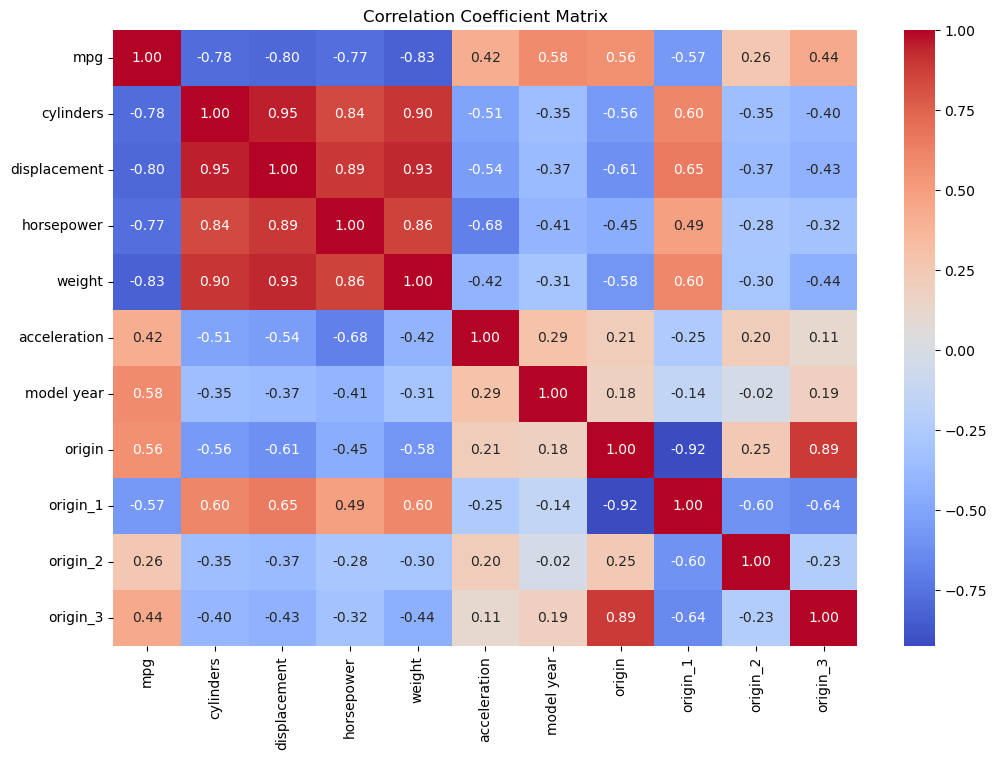

In [113]:
# Create a correlation coefficient visualization ( heat map  will be the best option to show correlation)
# Below, the red colors indicate a strong positive correlation, while the blue colors indicate a strong negative correlation.

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Coefficient Matrix') 
plt.show()

In [114]:
# drop origin column as we have created dummy variables for it to avoid multicollinearity
df = df.drop('origin', axis=1)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,True,False,False


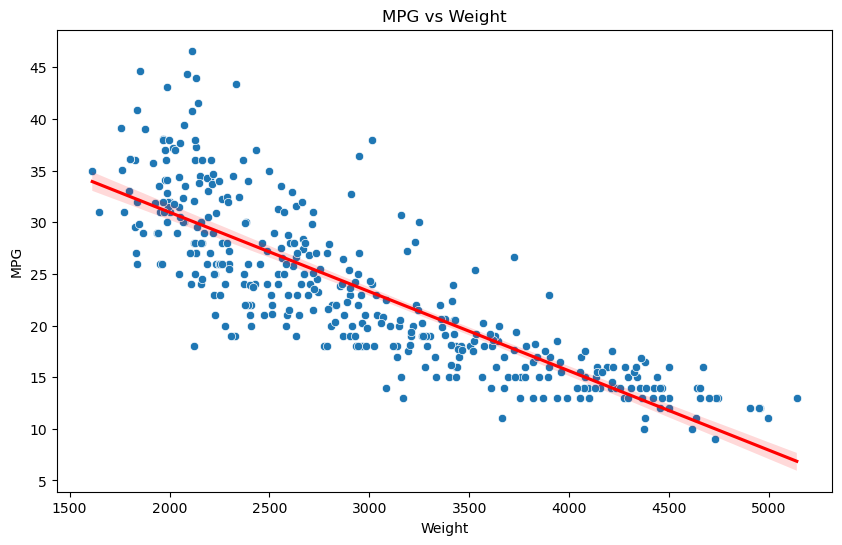

In [115]:
# Plot mpg versus weight.
#  Also, lets include a regression line to visualize the relationship better.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=df)
sns.regplot(x='weight', y='mpg', data=df, scatter=False, color='red')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

### Analyze this graph and explain how it relates to the corresponding correlation coefficient.

The red regression line slopes downward reflecting the negetive correlation coefficient of 0.83. This means the havier cars are getting lower miles per gallon. Also, -0.83 is pretty strong ( ~ 1.0 ) inverse linear fit.
In graph, the lighter cars have points apread widely above and below the line, whereas heavier cars are packed closely around the regression line. this means prediction uncertainty is higher for lighter cars compared to havier ones.
Strong negetive correlations also confirms that the weight the one of the most powerful predictor of fuel efficiency.

In [116]:
# Randomly split the data into 80% training data and 20% test data, where your target is mpg.

# Define features and target
features = df.drop('mpg', axis=1)
target = df['mpg']

# Split into 80% train, 20% test with random state for reproducibility
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set: {features_train.shape[0]} samples")
print(f"Test set: {features_test.shape[0]} samples")
print(f"Feature columns: {list(features.columns)}")

Training set: 318 samples
Test set: 80 samples
Feature columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3']


In [117]:
# Train an ordinary linear regression on the training data.

lr_model = LinearRegression()
lr_model.fit(features_train, target_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
# Make predictions on train and test sets
target_train_pred = lr_model.predict(features_train)
target_test_pred = lr_model.predict(features_test)

print(f"Model intercept: {lr_model.intercept_:.4f}")
print(f"Number of coefficients: {len(lr_model.coef_)}")

Model intercept: -20.2027
Number of coefficients: 9


So the model intercept is -20.2 and the number of coefficients, which means the features, are 9 viz. cylinders, displacement, horsepower, weight, acceleration, model year and 3 dummies created from origin variable. 


In [119]:
# Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

# calculating metrics for training set
train_r2 = r2_score(target_train, target_train_pred)
train_rmse = np.sqrt(mean_squared_error(target_train, target_train_pred))
train_mae = mean_absolute_error(target_train, target_train_pred)

# calculating metrics for test set
test_r2 = r2_score(target_test, target_test_pred)
test_rmse = np.sqrt(mean_squared_error(target_test, target_test_pred))
test_mae = mean_absolute_error(target_test, target_test_pred)

#print the results
print(f"Train R2: {train_r2:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}")
print(f"Test R2: {test_r2:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}")

Train R2: 0.8188, RMSE: 3.3703, MAE: 2.6055
Test R2: 0.8449, RMSE: 2.8878, MAE: 2.2876


### Interpretation:

The linear regression model we trained on the dataset has performed exceptionally well. 
Looking at the results, the model achieves an R2 score of 0.8188 on the training data and 0.8449 on the test data, which means it explains approximately 81 to 84% of the variance in fuel efficiency across both datasets. This is a strong indicator that our features weight, displacement, horsepower, cylinders, acceleration, model year, and the three origin dummies captures the essential drivers of miles per gallon efficiency.

What's particularly encouraging is that the test R2 is actually higher than the training R2, which is a little unusual but kind a positive signal. Atleast it confirms that the model is not overfitting to the training data and is generalizing well to unseen examples.

The root mean squared error which tells the accuracy on traning set is 3.37 mpg, while on the test set it drops to 2.89 mpg. Similarly, the mean absolute error which tells us the average prediction error is 2.61 mpg on training data and 2.29 mpg on test data. In practical terms, this means when the model makes a prediction about a car's fuel efficiency, it's typically off by about 2.3 miles per gallon on average. Given that our target variable ranges from 9 to 46.6 mpg, an average error of 2.3 mpg is quite good and demonstrates solid predictive power.

The consistent improvement from training to test metrics suggests that the model has struck a good balance between flexibility and simplicity. It's neither too rigid nor too complex. 

In summary, this linear regression model is a strong performer for predicting fuel efficiency. It reliably explains about 84% of mpg variation and makes predictions with an average error of 2 to 3 mpg.

### Pick another regression model and repeat the previous two steps.Note: Do NOT choose logistic regression as it is more like a classification model.

L2 regularization in ridge regression can handle multicollinearity well whereas L1 regularization in lasso regression can perform feature selection 
by shrinking some coefficients to zero. I know cylinders, displacement, horsepower and weight are highly correlated with mpg, so I will use Ridge Regression here.

In [120]:
# Ridge Regression with cross-validation to find best alpha
# RidgeCV automatically finds the best alpha via cross-validation
# Test a range of alpha values
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_cv_model = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv_model.fit(features_train, target_train)

print(f"Best alpha selected by cross-validation: {ridge_cv_model.alpha_}")


Best alpha selected by cross-validation: 10.0


In [121]:
# Make predictions using ridge model
ridge_train_pred = ridge_cv_model.predict(features_train)
ridge_test_pred = ridge_cv_model.predict(features_test)

print(f"Ridge Model intercept: {ridge_cv_model.intercept_:.4f}")
print(f"Count of coefficients: {len(ridge_cv_model.coef_)}")
print(f"Ridge Model coefficients: {ridge_cv_model.coef_}")


Ridge Model intercept: -19.7853
Count of coefficients: 9
Ridge Model coefficients: [-0.11597014  0.01662765 -0.01108651 -0.00706062  0.07343231  0.82082196
 -1.58233676  0.90713376  0.67520299]


In [122]:
# Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

# calculating metrics for training set
ridge_train_r2 = r2_score(target_train, ridge_train_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(target_train, ridge_train_pred))
ridge_train_mae = mean_absolute_error(target_train, ridge_train_pred)

# calculating the metric for test set
ridge_test_r2 = r2_score(target_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(mean_squared_error(target_test, ridge_test_pred))
ridge_test_mae = mean_absolute_error(target_test, ridge_test_pred)

#print the results
print(f"Ridge Train R2: {ridge_train_r2:.4f}, RMSE: {ridge_train_rmse:.4f}, MAE: {ridge_train_mae:.4f}")
print(f"Ridge Test R2: {ridge_test_r2:.4f}, RMSE: {ridge_test_rmse:.4f}, MAE: {ridge_test_mae:.4f}")



Ridge Train R2: 0.8185, RMSE: 3.3735, MAE: 2.6034
Ridge Test R2: 0.8444, RMSE: 2.8925, MAE: 2.2960


### Interpretation:
The Ridge regression model with cross validation selected an optimal alpha of 10.0 and achieved nearly identical performance to ordinary linear regression. The training R2 of 0.8185 and test R2 of 0.8444 are virtually the same as the linear model (0.8188 train, 0.8449 test), with almost no differences in error metrics. The RMSE on the test set is 2.89 mpg for Ridge vs linear regression, and MAE is 2.30 mpg for both models.

In summary, Ridge regression validates that the ordinary linear model was already optimal for this problem.